In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./cwru_train.csv',header=None)
df_test = pd.read_csv('./cwru_test.csv',header=None)
df = pd.concat([df_train, df_test], axis=0)
df.shape

(28000, 785)

In [3]:
all_data = df.to_numpy()
all_data.shape

(28000, 785)

In [4]:
X = all_data[:, 1:]
y = all_data[:, 0]
X.shape, y.shape

((28000, 784), (28000,))

<BarContainer object of 10 artists>

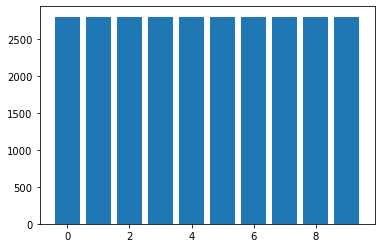

In [5]:
data_by_label = {}
for i in set(y):
    data_by_label[i] = []
for i, item in enumerate(y):
    data_by_label[item].append(X[i].tolist())

plt.bar(x=list(data_by_label.keys()), height=[len(data_by_label[key]) for key in data_by_label.keys()])

In [6]:
all_train_data = {}
all_test_data = {}

users = [0]
all_train_data['users'] = users
all_test_data['users'] = users

In [7]:
num_train_samples = []
num_test_samples = []
train_user_data = {}
test_user_data = {}

In [8]:
len(X)

28000

In [9]:
for user in users:
    train_user_data[user] = {}
    test_user_data[user] = {}

    train_user_data[user]['x'] = []
    train_user_data[user]['y'] = []
    test_user_data[user]['x'] = []
    test_user_data[user]['y'] = []

    len_x = 28000
    p = int(0.75*len_x)

    train_user_data[user]['x'].extend(X[:p])
    train_user_data[user]['y'].extend(y[:p])

    test_user_data[user]['x'].extend(X[p:])
    test_user_data[user]['y'].extend(y[p:])

    num_train_samples.append(len(train_user_data[user]['y']))
    num_test_samples.append(len(test_user_data[user]['y']))
    
all_train_data['num_samples'] = num_train_samples
all_test_data['num_samples'] = num_test_samples
all_train_data['user_data'] = train_user_data
all_test_data['user_data'] = test_user_data

In [10]:
len(train_user_data[user]['x'])

21000

In [11]:
len(test_user_data[user]['x'])

7000

In [12]:
all_train_data['users']

[0]

In [13]:
all_train_data['user_data'][0]['y'][:10]

[8.0, 3.0, 0.0, 9.0, 0.0, 0.0, 4.0, 4.0, 3.0, 0.0]

In [14]:
all_train_data['num_samples']

[21000]

In [15]:
all_test_data['user_data'][0]['y'][:10]

[2.0, 3.0, 9.0, 7.0, 5.0, 6.0, 6.0, 6.0, 3.0, 6.0]

In [16]:
all_test_data['num_samples']

[7000]

In [17]:
with open('./train_json_centralized/train.json', 'w') as outfile:
        json.dump(all_train_data, outfile)
with open('./test_json_centralized/test.json', 'w') as outfile:
    json.dump(all_test_data, outfile)

TypeError: Object of type ndarray is not JSON serializable